In [2]:
import tensorflow as tf

C:\Users\06411\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.9.0'

## MNIST 

    다운로드된 데이터는 55,000개의 학습 데이터(mnist.train), 10,000개의 테스트 데이터(mnist.text), 
    그리고 5,000개의 검증 데이터(mnist.validation) 이렇게 세 부분으로 나뉩니다. 

    데이터가 이렇게 나뉜다는 것은 매우 중요합니다. 왜냐하면 우리가 학습시키지 않는 데이터를 통해, 
    우리가 학습한 것이 정말로 일반화되었다고 확신할 수 있기 때문입니다!
    

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 28 * 28 = 784


        이 배열을 펼쳐서 28x28 = 784 개의 벡터로 만들 수 있습니다. 이미지들 간에 일관적으로 처리하기만 한다면, 
        배열을 어떻게 펼치든지 상관없습니다.
        이러한 관점에서, MNIST 이미지는 매우 호화스러운 구조(주의 : 연산을 많이 요하는 시각화입니다)를 가진,
        단지 784차원 벡터 공간에 있는 여러 개의 데이터일 뿐입니다.
        

In [10]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.train.images.shape

(55000, 784)

### 변수 정의 

### X 정의 

    x에 특정한 값이 주어진 것은 아닙니다. 이는 'placeholder'로, 우리가 텐서플로우에서 연산을 실행할 때 값을 입력할 자리입니다.
    여기서는 784차원의 벡터로 변형된 MNIST 이미지의 데이터를 넣으려고 합니다

In [7]:
X = tf.placeholder(tf.float32, [None, 784])

In [8]:
Y = tf.placeholder(tf.float32, [None, 10])

In [9]:
W = tf.Variable(tf.zeros([784,10]))

In [10]:
b = tf.Variable(tf.zeros([10]))

In [11]:
logit_y = tf.matmul(X,W) + b

### 소프트맥스 회귀는 두 단계로 이루어집니다. 

    우선 입력한 데이터가 각 클래스에 속한다는 증거(evidence)를 수치적으로 계산하고, 그 뒤엔 계산한 값을 확률로 변환하는 것입니다.



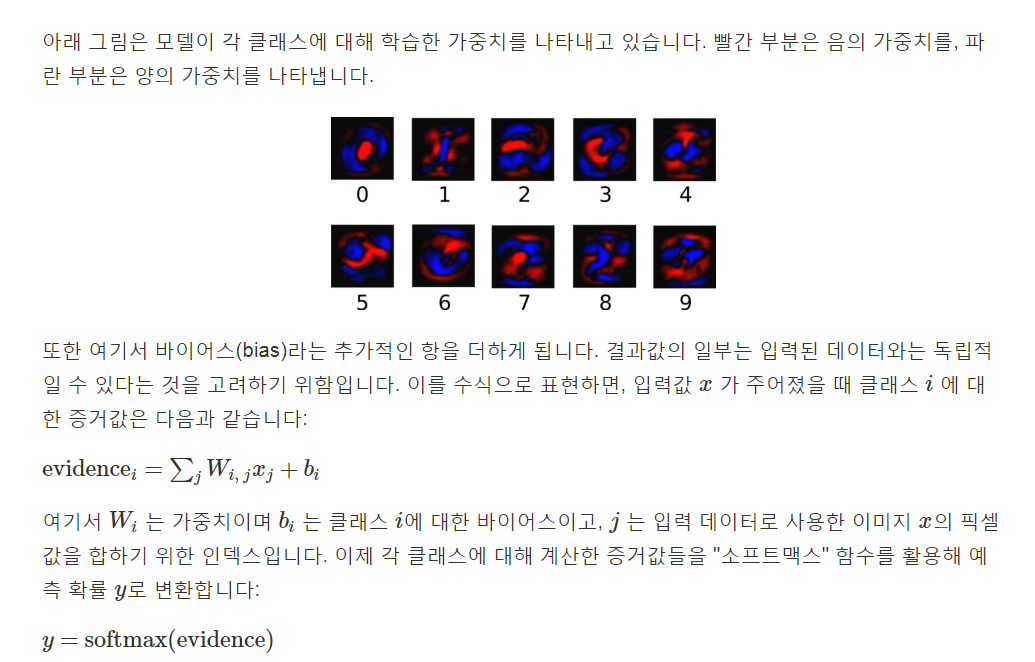

In [13]:
from IPython.display import Image

Image("./softmax.png")

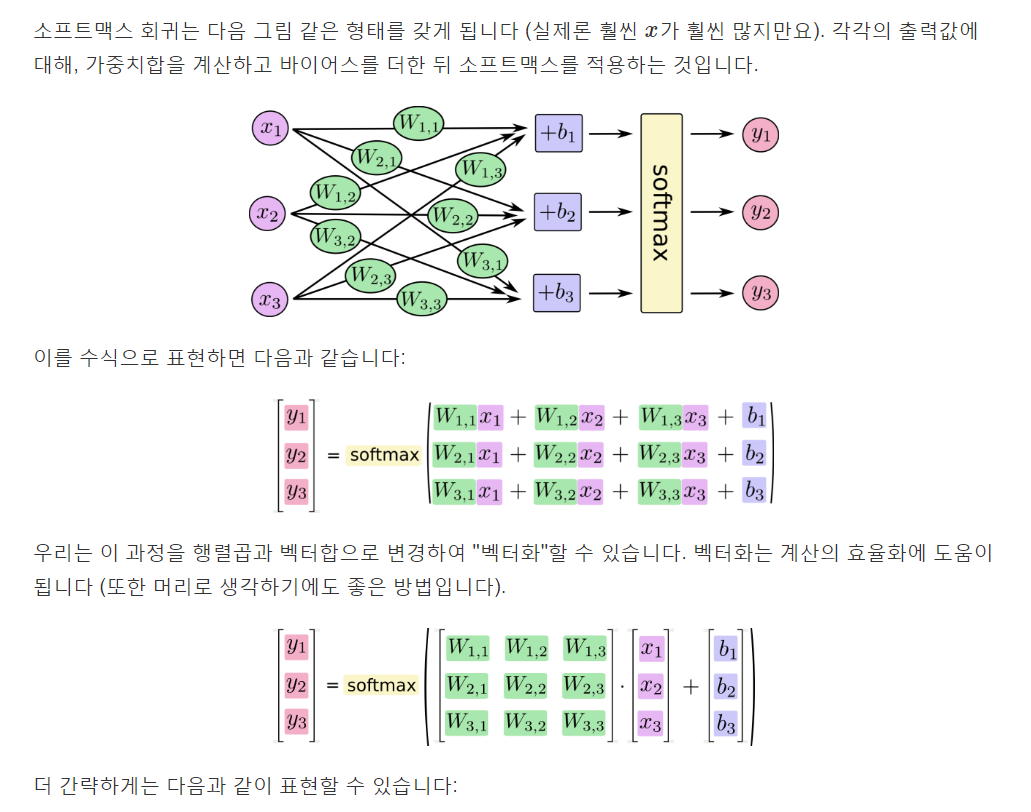

In [14]:
from IPython.display import Image

Image("./softmax1.png")

In [12]:
softmax_y = tf.nn.softmax(logit_y)

### 모델의 손실을 정의

    하기 위해 자주 사용되는 좋은 함수 중 하나로 "크로스 엔트로피"가 있습니다. 
    원래 크로스 엔트로피는 정보 이론 분야에서 정보를 압축하는 방법으로써 고안된 것이지만, 
    현재는 도박에서 머신러닝에 이르기까지 여러 분야에서 중요한 아이디어로 사용되고 있습니다. 
    크로스 엔트로피는 다음과 같이 정의됩니다:



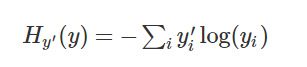

In [11]:
from IPython.display import Image

Image("./cross_entropy.png")

###  손실함수 설명 

    tf.log는 y의 각 원소의 로그 값을 계산합니다. 그 다음, y_의 각 원소를 tf.log(y)의 해당하는 원소들과 곱합니다. 
    그리고 tf.reduce_sum으로 y의 2번째 차원(reduction_indices=[1]이라는 파라미터가 주어졌으므로)의 원소들을 합합니다.
    마지막으로, tf.reduce_mean으로 배치(batch)의 모든 예시에 대한 평균을 계산합니다.

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(softmax_y), reduction_indices=[1]))

### 최적화 처리

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [16]:
init = tf.global_variables_initializer()

In [17]:
sess = tf.Session()

In [18]:
sess.run(init)

###  학습 시키기

    반복되는 루프의 각 단계마다, 우리는 학습 데이터셋에서 무작위로 선택된 100개의 데이터로 구성된 "배치(batch)"를 가져옵니다. 
    그 다음엔 placeholder의 자리에 데이터를 넣을 수 있도록 train_step을 실행하여 배치 데이터를 넘깁니다.
    
    무작위 데이터의 작은 배치를 사용하는 방법을 확률적 학습(stochastic training)이라고 부릅니다 --
    여기서는 확률적 경사 하강법입니다. 이상적으로는 학습의 매 단계마다 전체 데이터를 사용하고 
    싶지만(그렇게 하는게 우리가 지금 어떻게 하는게 좋을지에 대해 더 잘 알려줄 것이므로), 
    그렇게 하면 작업이 무거워집니다. 따라서 그 대신에 매번 서로 다른 부분집합을 사용하는 것입니다. 
    
    이렇게 하면 작업 내용은 가벼워지지만 전체 데이터를 쓸 때의 이점은 거의 다 얻을 수 있기 때문입니다.

In [19]:
for i in range(1000) :
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X:batch_xs, Y: batch_ys})

### 모델 평가

    우선 모델이 라벨을 올바르게 예측했는지 확인해봅시다.
    tf.argmax는 텐서 안에서 특정 축을 따라 가장 큰 값의 인덱스를 찾기에 매우 유용한 함수입니다. 
    예를 들면, tf.argmax(y,1)는 우리의 모델이 생각하기에 각 데이터에 가장 적합하다고 판단한(가장 증거값이 큰) 라벨이며,
    tf.argmax(y_,1)는 실제 라벨입니다. 우리는 tf.equal을 사용하여 우리의 예측이 맞았는지 확인할 수 있습니다.



In [20]:
correct_prediction = tf.equal(tf.argmax(softmax_y,1), tf.argmax(Y,1))

In [21]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
print(" 정확도 ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

 정확도  0.9094
